This code generates a histogram of the samples generated by the Metropolis-Hastings algorithm, which approximates the true distribution of the mean of the target distribution. The histogram should be centered around the true mean value of 5 and have a standard deviation of 2.

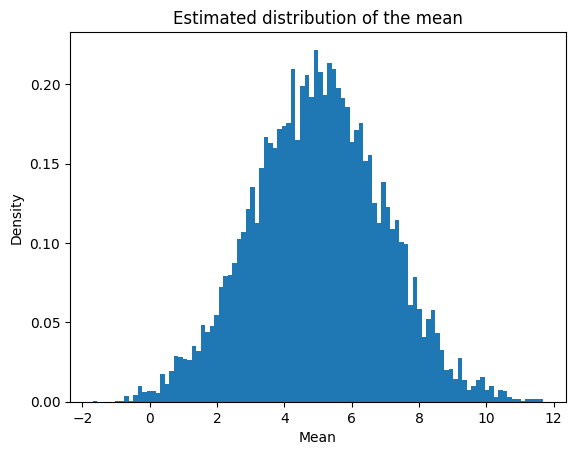

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

# Define the target distribution
true_mean = 5
true_std = 2
target_dist = np.random.normal(true_mean, true_std, 1000)

# Define the proposal distribution
proposal_mean = 0
proposal_std = 1

# Initialize the chain
chain_length = 10000
chain = np.zeros(chain_length)
chain[0] = np.random.normal(proposal_mean, proposal_std)

# Define the acceptance function
def acceptance_prob(current, proposed, sigma_proposal):
    numerator = np.exp(-0.5 * (proposed - true_mean)**2 / true_std**2)
    denominator = np.exp(-0.5 * (current - true_mean)**2 / true_std**2)
    return numerator / denominator

# Run the chain
for i in range(1, chain_length):
    proposed = np.random.normal(chain[i-1], proposal_std)
    acceptance = acceptance_prob(chain[i-1], proposed, proposal_std)
    if np.random.uniform() < acceptance:
        chain[i] = proposed
    else:
        chain[i] = chain[i-1]

# Plot the results
plt.hist(chain, bins=100, density=True)
plt.title('Estimated distribution of the mean')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.show()